<a href="https://colab.research.google.com/github/cltl/python-for-text-analysis/blob/colab/Chapters-colab/Chapter_17_Data_formats_II_(JSON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Data.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/images.zip
!wget https://github.com/cltl/python-for-text-analysis/raw/master/zips/Extra_Material.zip

!unzip Data.zip -d ../
!unzip images.zip -d ./
!unzip Extra_Material.zip -d ../

!rm Data.zip
!rm Extra_Material.zip
!rm images.zip

# Chapter 17: Data formats (JSON)

Let's have a look at another data format: JSON (JavaScript Object Notation). JSON is a lightweight data-interchange format that is easy for humans to read and write, and easy for machines to parse and generate. There is a good chance that at some point you will be gathering information through an API that is formatted in JSON (e.g. Twitter data). 


### At the end of this chapter, you will be able to:

* read and write JSON dictionary files
* deal with multiple layers of nesting within JSON dictionary structures

### If you want to learn more about these topics, you might find the following links useful:
* [Video: Working With JSON](https://www.youtube.com/watch?v=Kf0q4Tf5M3c)
* [Tutorial: Working With JSON Data in Python](https://realpython.com/python-json/)

If you have **questions** about this chapter, please contact us at cltl.python.course@gmail.com.

## 1. Introduction to JSON

JSON is completely language independent. However, data formatted in JSON works just like a Python dictionary! 


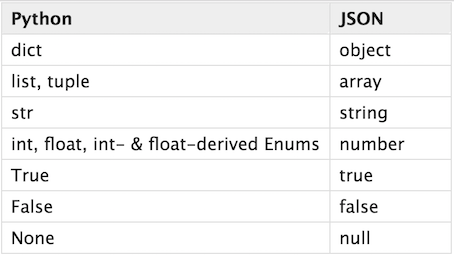

In [2]:
from IPython.display import Image
Image('./images/python_json_conversion_table.png')

We will show how JSON looks like and how to deal with JSON in Python with the example dictionary shown below. 

In [3]:
dict_doe_family = {     
    "John": {
        "first name": "John", 
        "last name": "Doe", 
        "gender": "male", 
        "age": 30, 
        "favorite_animal": "panda",
        "married": True,
        "children": ["James", "Jennifer"],
        "hobbies": ["photography", "sky diving", "reading"]},
    "Jane": {
        "first name": "Jane", 
        "last name": "Doe", 
        "gender": "female", 
        "age": 27, 
        "favorite_animal": "zebra",
        "married": False,
        "children": None,
        "hobbies": ["cooking", "gaming", "tennis"]}}

You can inspect any of the JSON files that we will generate or load below using a text editor (e.g. [Atom](https://atom.io/), [BBEdit](https://www.barebones.com/products/bbedit/download.html) or [Notepad++](https://notepad-plus-plus.org)).

## 2. Working with JSON in Python

You could read in a JSON file just like any other text file:

In [4]:
with open('../Data/json_data/fruits.json') as infile:
    text = infile.read()
print(text)

{
    "fruit": "Apple",
    "size": "Large",
    "color": "Red"
}



However, since it is structured to correspond well to Python objects, we use an existing mudule, the [**json**](https://docs.python.org/3/library/json.html) library, which provides an easy way to encode and decode data in JSON.  Let's first import it:

In [5]:
import json

We will focus on the following methods:
* **to read JSON**: the methods `json.load()` and `json.loads()`
* **to write JSON**: the methods `json.dump()` and `json.dumps()`

The functions with an **s** take string arguments.

### 2.1 Loading JSON from file or string
The `load()` method is used to load a JSON encoded file as a Python dictionary:

In [6]:
# open file just as you would open a txt file
with open("../Data/json_data/Doe.json", "r") as infile:
    # read in file content as dict using the json module
    dict_doe_family = json.load(infile)
    print(type(dict_doe_family))
    print(dict_doe_family)

<class 'dict'>
{'Jane': {'age': 27, 'children': None, 'favorite_animal': 'zebra', 'first name': 'Jane', 'gender': 'female', 'hobbies': ['cooking', 'gaming', 'tennis'], 'last name': 'Doe', 'married': False}, 'John': {'age': 30, 'children': ['James', 'Jennifer'], 'favorite_animal': 'panda', 'first name': 'John', 'gender': 'male', 'hobbies': ['photography', 'sky diving', 'reading'], 'last name': 'Doe', 'married': True}}


The `loads()` method is used to load a JSON formatted string as a Python dictionary. This is useful if you want to create a json dictionary from a string. There are not many situations in which you will have to use it. You may come accross json structures stored as strings in when working with corpora or collecting human annotations with annotation software. 


In [7]:
str_doe_family = """
{
    "Jane": {
        "age": 27,
        "children": null,
        "favorite_animal": "zebra",
        "first name": "Jane",
        "gender": "female",
        "hobbies": [
            "cooking",
            "gaming",
            "tennis"
        ],
        "last name": "Doe",
        "married": false
    },
    "John": {
        "age": 30,
        "children": [
            "James",
            "Jennifer"
        ],
        "favorite_animal": "panda",
        "first name": "John",
        "gender": "male",
        "hobbies": [
            "photography",
            "sky diving",
            "reading"
        ],
        "last name": "Doe",
        "married": true
    }
}
"""

dict_doe_family = json.loads(str_doe_family)
print(type(dict_doe_family))
print(dict_doe_family)

<class 'dict'>
{'Jane': {'age': 27, 'children': None, 'favorite_animal': 'zebra', 'first name': 'Jane', 'gender': 'female', 'hobbies': ['cooking', 'gaming', 'tennis'], 'last name': 'Doe', 'married': False}, 'John': {'age': 30, 'children': ['James', 'Jennifer'], 'favorite_animal': 'panda', 'first name': 'John', 'gender': 'male', 'hobbies': ['photography', 'sky diving', 'reading'], 'last name': 'Doe', 'married': True}}


### 2.2 Writing JSON to file or string
Let's first define our Python dictionary again:

In [8]:
dict_doe_family = {     
    "John": {
        "first name": "John", 
        "last name": "Doe", 
        "gender": "male", 
        "age": 30, 
        "favorite_animal": "panda",
        "married": True,
        "children": ["James", "Jennifer"],
        "hobbies": ["photography", "sky diving", "reading"]},
    "Jane": {
        "first name": "Jane", 
        "last name": "Doe", 
        "gender": "female", 
        "age": 27, 
        "favorite_animal": "zebra",
        "married": False,
        "children": None,
        "hobbies": ["cooking", "gaming", "tennis"]}}

The **`json.dump()`** method is used to write a Python dictionary to a JSON encoded file:

In [9]:
with open("../Data/json_data/Doe.json", "w") as outfile:
     json.dump(dict_doe_family, outfile)

The **`dumps()`** method is used to convert a Python dictionary to a JSON formatted string:

In [10]:
str_doe_family = json.dumps(dict_doe_family)
print(str_doe_family)

{"John": {"first name": "John", "last name": "Doe", "gender": "male", "age": 30, "favorite_animal": "panda", "married": true, "children": ["James", "Jennifer"], "hobbies": ["photography", "sky diving", "reading"]}, "Jane": {"first name": "Jane", "last name": "Doe", "gender": "female", "age": 27, "favorite_animal": "zebra", "married": false, "children": null, "hobbies": ["cooking", "gaming", "tennis"]}}


Both `dump()` and `dumps()` use the same keyword parameters. You can check them out with `help()`:

**Hint**: There are ways of formating the dictionary nicely. Can you find out how it works from reading the documentation?

In [11]:
help(json.dumps)
#help(json.dump)

Help on function dumps in module json:

dumps(obj, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` to a JSON formatted ``str``.
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the return value can contain non-ASCII
    characters if they appear in strings contained in ``obj``. Otherwise, all
    such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``OverflowError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    serialize out of range ``float`` values (``nan``, ``inf``, ``-inf``) in
    stric

Two useful keyword arguments are for example `indent` and `sort_keys`. They are illustrated below:

In [12]:
# Create the JSON file
with open("../Data/json_data/Doe.json", "w") as outfile:
     json.dump(dict_doe_family, 
               outfile, 
               indent=4, 
               sort_keys=True)

# Read in the JSON file again
with open("../Data/json_data/Doe.json", "r") as infile:
    json_string = infile.read()
    print(json_string)

{
    "Jane": {
        "age": 27,
        "children": null,
        "favorite_animal": "zebra",
        "first name": "Jane",
        "gender": "female",
        "hobbies": [
            "cooking",
            "gaming",
            "tennis"
        ],
        "last name": "Doe",
        "married": false
    },
    "John": {
        "age": 30,
        "children": [
            "James",
            "Jennifer"
        ],
        "favorite_animal": "panda",
        "first name": "John",
        "gender": "male",
        "hobbies": [
            "photography",
            "sky diving",
            "reading"
        ],
        "last name": "Doe",
        "married": true
    }
}


In [13]:
str_doe_family = json.dumps(dict_doe_family, 
                            indent=4, 
                            sort_keys=True)
print(str_doe_family)

{
    "Jane": {
        "age": 27,
        "children": null,
        "favorite_animal": "zebra",
        "first name": "Jane",
        "gender": "female",
        "hobbies": [
            "cooking",
            "gaming",
            "tennis"
        ],
        "last name": "Doe",
        "married": false
    },
    "John": {
        "age": 30,
        "children": [
            "James",
            "Jennifer"
        ],
        "favorite_animal": "panda",
        "first name": "John",
        "gender": "male",
        "hobbies": [
            "photography",
            "sky diving",
            "reading"
        ],
        "last name": "Doe",
        "married": true
    }
}


## 3. Accessing data in a json dictionary

Note that the values in this dictionary can be containers themselves: Each key has another dictionary as a value. The keys 'children' and 'hobbies' have lists as values. Note that we can look at such a dictionary in terms of **layers of nesting**.


Consider the dict below. How many layers (i.e. containers within containers) can you identify?

In [14]:
dict_doe_family = {     
    "John": {
        "first name": "John", 
        "last name": "Doe", 
        "gender": "male", 
        "age": 30, 
        "favorite_animal": "panda",
        "married": True,
        "children": ["James", "Jennifer"],
        "hobbies": ["photography", "sky diving", "reading"]},
    "Jane": {
        "first name": "Jane", 
        "last name": "Doe", 
        "gender": "female", 
        "age": 27, 
        "favorite_animal": "zebra",
        "married": False,
        "children": None,
        "hobbies": ["cooking", "gaming", "tennis"]}}

Often, we will need to extract information from such a nested structure. To do this, it is helpful to remember what you have learned in Block II about containers and looping. 

Let's say we want to extract the hobbies of Doe family members. How could we approach this? There are various ways of working your way through the layers. 

For instance, you can use dictionary keys:

In [15]:
# access information about John
john_info = dict_doe_family['John']
print(john_info)
# access information about John's hobbies:
john_hobbies = john_info['hobbies']
print(john_hobbies)

# You can also do this in one go:
john_hobbies = dict_doe_family['John']['hobbies']


{'first name': 'John', 'last name': 'Doe', 'gender': 'male', 'age': 30, 'favorite_animal': 'panda', 'married': True, 'children': ['James', 'Jennifer'], 'hobbies': ['photography', 'sky diving', 'reading']}
['photography', 'sky diving', 'reading']


Now let's extract the hobbies of all family members. Can you finish the code below?

**Hint**: If you are confused about how to access elements in the structure, the type() function is your friend! If you are having a hard time remembering how to deal with the different containers, please have a look at the chapters about containers. Also, remember that you can always get a list of all methods of a container by using the dir() function (+ help() to see what they are doing). 

In [16]:
# iterate over family dict by accessing 
#the family members (keys) and their information (values):

all_hobbies = []
for member, info_dict in dict_doe_family.items():
    # check what we are accessing:
    print(member, type(info_dict))
    # access hobbies from info_dict
    hobbies = info_dict['hobbies']
    print(hobbies)
    # your code here
    

John <class 'dict'>
['photography', 'sky diving', 'reading']
Jane <class 'dict'>
['cooking', 'gaming', 'tennis']


## Exercises

### Exercise 1:
What is the difference between `str()` and `json.dumps()` to convert a Python dictionary to a string? Try it out below.

In [17]:
dict_doe_family = {     
    "John": {
        "first name": "John", 
        "last name": "Doe", 
        "gender": "male", 
        "age": 30, 
        "favorite_animal": "panda",
        "married": True,
        "children": ["James", "Jennifer"],
        "hobbies": ["photography", "sky diving", "reading"]},
    "Jane": {
        "first name": "Jane", 
        "last name": "Doe", 
        "gender": "female", 
        "age": 27, 
        "favorite_animal": "zebra",
        "married": False,
        "children": None,
        "hobbies": ["cooking", "gaming", "tennis"]}}

In [18]:
str_doe_family = json.dumps(dict_doe_family)
print(str_doe_family)

{"John": {"first name": "John", "last name": "Doe", "gender": "male", "age": 30, "favorite_animal": "panda", "married": true, "children": ["James", "Jennifer"], "hobbies": ["photography", "sky diving", "reading"]}, "Jane": {"first name": "Jane", "last name": "Doe", "gender": "female", "age": 27, "favorite_animal": "zebra", "married": false, "children": null, "hobbies": ["cooking", "gaming", "tennis"]}}


In [19]:
str_doe_family = str(dict_doe_family)
print(str_doe_family)

{'John': {'first name': 'John', 'last name': 'Doe', 'gender': 'male', 'age': 30, 'favorite_animal': 'panda', 'married': True, 'children': ['James', 'Jennifer'], 'hobbies': ['photography', 'sky diving', 'reading']}, 'Jane': {'first name': 'Jane', 'last name': 'Doe', 'gender': 'female', 'age': 27, 'favorite_animal': 'zebra', 'married': False, 'children': None, 'hobbies': ['cooking', 'gaming', 'tennis']}}


### Exercise 2:
Working with JSON data thus means working with dictionaries. Let's practice a bit more with accessing the values of dictionaries by printing the following:
* all (parent) names
* the age of Jane
* the first hobby of John
* the favorite animal of each person (use a for-loop)

In [20]:
# Example: This will print the gender of "John"
print(dict_doe_family["John"]["gender"])

male


### Exercise 3:
Please add the following entry to `dict_doe_family`. Write the result to a JSON file.

In [21]:
julia = {"Julia": {"first name": "Julia", 
                   "last name": "Doe",
                   "age": 29, 
                   "favorite_animal": "penguin",
                   "married": False,
                   "children": ["Jack"],
                   "hobbies": ["snowboarding", "hiking"]}}

# your code here

### Exercise 4:
Let's have a look at another example. The JSON file `../Data/json_data/StrangerThings.json` contains information about episodes from the TV show Stranger Things. Read the file and store the dictionary as `tv_show`. 

In [22]:
tv_show = # your code here

SyntaxError: ignored

To help you understand the structure a bit, first have a look at the following examples:

In [23]:
print(tv_show.keys())

NameError: ignored

In [24]:
print(tv_show["_embedded"].keys())

NameError: ignored

In [25]:
print(tv_show["_embedded"]["episodes"])

NameError: ignored

Print the following information about the TV show:
* the language 
* the summary 
* the genres 
* the average rating
* the url of the original image of the TV show

Print the following information about its episodes:
* the number of episodes
* all urls of the episodes
* the summary of the 5th episode (Chapter Five) of season 1
* the url of the original image of the episode with id 578664
* all names and season numbers of the episodes where "Nancy" is mentioned in the summary